# First attempt at creating my own project

# Start with reading in libraries
First block is default copy to bring in np and pd
Really like the list of files in the current directory, need to remember that for next project

Second block is copy paste of a bunch of libraries from a project trying to run random forest on the results. Maybe good for later. First wanna try SLR

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [2]:
import tensorflow as tf
import tensorflow_decision_forests as tfdf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Comment this if the data visualisations doesn't work on your side
%matplotlib inline

# Reading and exploring different files

In [3]:
sample_submission = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv")
sample_submission.head(10)

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977
5,1466,177150.989247
6,1467,172070.659229
7,1468,175110.956520
8,1469,162011.698832
9,1470,160726.247831


In [4]:
data_description = open('/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt')

In [5]:
test = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")

test.head(5)
#Note that test has same number of rows as sample_sumbission, and the IDs match

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [6]:
train = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")

train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Understanding key variables
Lets start with an understanding of SalePrice, because that's gonna be our independent.

In [7]:
print(train.SalePrice.describe())
#First instinct is that sale price is in dollars, so we might want to treat it log? 
#Range doesn't seem to be that large though. Let's see what a distribution looks like

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='SalePrice', ylabel='Count'>

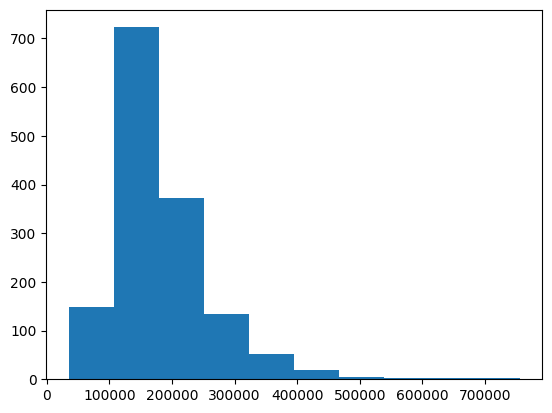

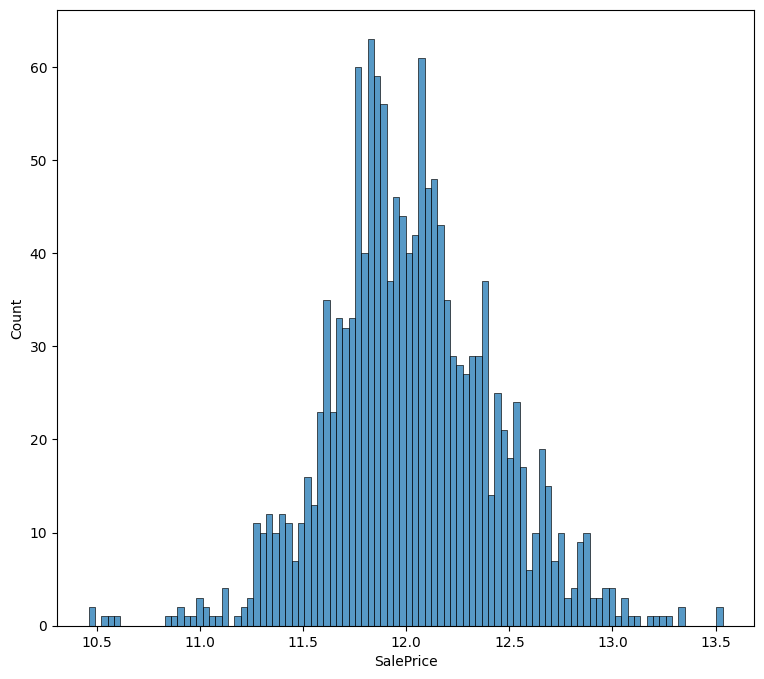

In [8]:
plt.hist(train.SalePrice)
#Looking at my cheat sheet, we want to do a histogram with more detail, so lets mess with some settings
plt.figure(figsize = (9, 8)) #Blow up size of graph
#sns.histplot(train.SalePrice, bins = 100)
#Definitely left skew. Lets try it with log?
sns.histplot(np.log(train["SalePrice"]), bins = 100)
#Looks much more centered, better to make predictions with.



In [9]:
#Curious about the desc for this new column
np.log(train["SalePrice"]).describe()

count    1460.000000
mean       12.024051
std         0.399452
min        10.460242
25%        11.775097
50%        12.001505
75%        12.273731
max        13.534473
Name: SalePrice, dtype: float64

In [10]:
#Cribbing from the cheat sheet to look at distributions for all numeric features:
#Look at types for all features
list(set(train.dtypes.tolist()))

[dtype('float64'), dtype('O'), dtype('int64')]

In [11]:
#Looks like we have three different types, float, int, and O (not sure what O is)
df_num = train.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


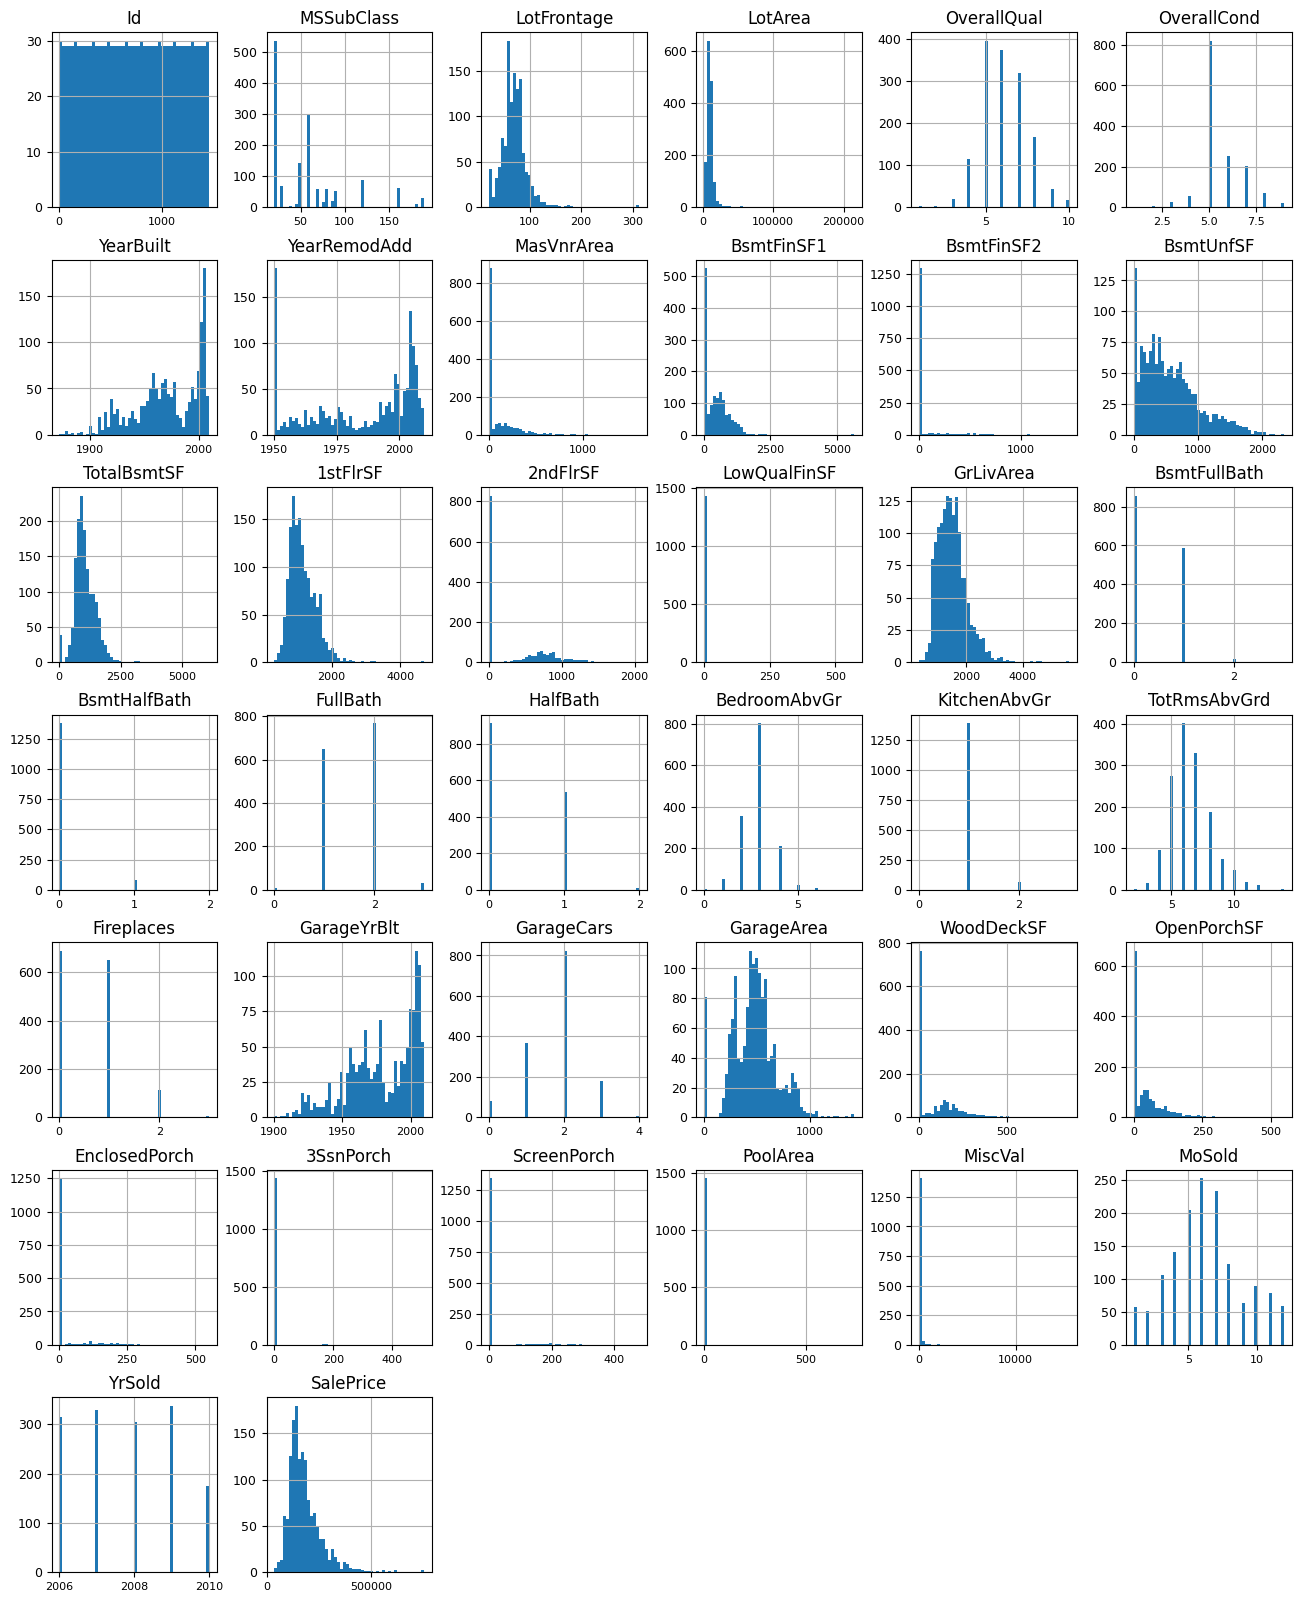

In [12]:
df_num.hist(figsize = (16, 20), bins = 50, xlabelsize = 8, ylabelsize = 9);
#Wow, semi-colon is super important here. Changes the code from outputing a stringified list of objects to outputting a series of charts
#As for the Charts:
#ID is super boring
#MS SubClass looks like there are a lot of specific values, also this is overall left skewed, maybe categorical?
#Lot Frontage is hugely left skewed, should be log
#Lot Area is hugely left skewed, should be log
#Overall Qual and Overal Cond both seem more categorical as they only go 1-10 basically.
#Lots of these variables have huge 0 spikes, probably representing missing data. Might want to have a way to categorize that more clearly. 
#At least for SLR maybe we drop these (YearRemodAdd, MasVnrArea, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF)


# Prepping the Dataset for Modeling
Not sure how much prep I wanna do here, beyond 'log' on some variables and ignoring some others.
